# Homework 1
## Damian Franco
## CS-575

In [28]:
# Importing the required modules
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import time
from prettytable import PrettyTable
%matplotlib inline

In [29]:
# Saves the current plot to desktop since working in Google Colab
from google.colab import files
#plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
#files.download("my_plot.png")

## Question 1 - MatVec

In [30]:
# Function to perform matrix-vector multiplication
def mat_vec(local_A, local_b):
    local_x = np.zeros(local_b.shape)
    local_n = len(local_b)

    for i in range(local_n):
      for j in range(local_n):
        local_x[i] += A[i][j] * b[j]
    
    return local_x

In [31]:
simple_A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
simple_b = np.array([1, 2, 3])

In [32]:
print(simple_A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
print(simple_b)

[1 2 3]


In [34]:
exact = simple_A.dot(simple_b)
#approx = mat_vec(simple_A, simple_b)
print(exact)
#print(approx)

[14 32 50]


In [35]:
#print(exact @ approx)

In [36]:
# This set of N values should generally work well for most machines for Mat-vec
# Changed this to fit more appropiatly with some tests on my machine
N_arr = np.array([160, 320, 640, 1280, 2560]) 
time_list = []
err_list = []
for N in N_arr:
    
    #Generate random vectors and matrices
    A = np.random.rand(N,N)
    b = np.random.rand(N)
    
    
    t_start = time.time()
    x_mine = mat_vec(A,b)
    t_end = time.time()
    
    #Verification
    x_true = A@b
    err_list.append(np.linalg.norm(x_mine - x_true))
    #assert(diff < 1e-12*N)
    
    time_list.append(t_end-t_start)
  

In [37]:
# Create error table with sizes
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["N size", "Runtime Speed (sec)", "Error"])

# Add rows
for i in range(len(N_arr)):
  myTable.add_row([N_arr[i], time_list[i], err_list[i]])

print(myTable)

+--------+----------------------+------------------------+
| N size | Runtime Speed (sec)  |         Error          |
+--------+----------------------+------------------------+
|  160   | 0.028046369552612305 | 1.828181031309641e-13  |
|  320   | 0.12946295738220215  | 8.350615526213665e-13  |
|  640   |  0.3425450325012207  | 3.155449810435953e-12  |
|  1280  |  1.222386121749878   | 1.3132060076239651e-11 |
|  2560  |  4.551675796508789   | 4.840977249419064e-11  |
+--------+----------------------+------------------------+


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

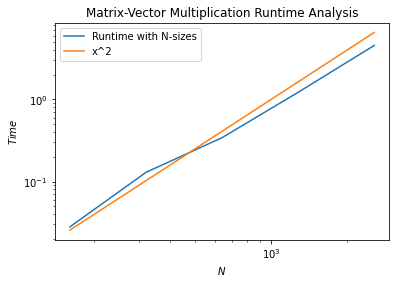

In [40]:
# Plot the runtime results
plt.loglog(N_arr, time_list, label='Runtime with N-sizes')
plt.xlabel('$N$')
plt.ylabel('$Time$')

# Plotting the x^2 asymptotic bound
x_cords = range(160, 2560)
y_cords = [x*x*1e-6 for x in x_cords]
plt.plot(x_cords, y_cords, label='x^2')

plt.legend(loc="upper left")
plt.title('Matrix-Vector Multiplication Runtime Analysis')

plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
files.download("my_plot.png")
plt.show() 


## Question 2 - MatMat

In [13]:
# Function to perform matrix-matrix multiplication
def mat_mat(local_A, local_b):
    
    local_x = np.zeros(local_b.shape)
    local_n = len(local_A)

    for i in range(local_n):
      for j in range(local_n):
        for k in range(local_n):
          local_x[i][j] += A[i][k] * b[k][j]
    
    return local_x

In [14]:
simple_A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
simple_b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [15]:
exact = simple_A.dot(simple_b)
approx = mat_vec(simple_A, simple_b)
print(exact)
print(approx)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[1.44125726 1.44125726 1.44125726]
 [0.45946326 0.45946326 0.45946326]
 [0.71837834 0.71837834 0.71837834]]


In [19]:
# This set of N values should generally work well for most machines for Mat-vec
# Changed this to fit more appropiatly with some tests on my machine
N_arr = np.array([20, 40, 80, 160, 320]) 
time_list = []
for N in N_arr:
    
    #Generate random vectors and matrices
    A = np.random.rand(N,N)
    b = np.random.rand(N,N)
    
    
    t_start = time.time()
    x_mine = mat_mat(A,b)
    t_end = time.time()
    
    #Verification
    x_true = A@b
    diff = np.linalg.norm(x_mine - x_true)
    #assert(diff < 1e-12*N)
    
    time_list.append(t_end-t_start)
  

In [20]:
# Create error table with sizes
# Specify the Column Names while initializing the Table
table2 = PrettyTable(["N size", "Runtime Speed (sec)", "Error"])

# Add rows
for i in range(len(N_arr)):
  table2.add_row([N_arr[i], time_list[i], err_list[i]])

print(table2)

+--------+---------------------+------------------------+
| N size | Runtime Speed (sec) |         Error          |
+--------+---------------------+------------------------+
|   20   | 0.01804351806640625 | 1.8336959187428107e-13 |
|   40   | 0.07774543762207031 | 8.098940525528068e-13  |
|   80   |  0.512141227722168  | 3.3092684066257312e-12 |
|  160   |  4.118232488632202  | 1.2828112654792042e-11 |
|  320   |  32.84832692146301  | 4.867509624235047e-11  |
+--------+---------------------+------------------------+


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

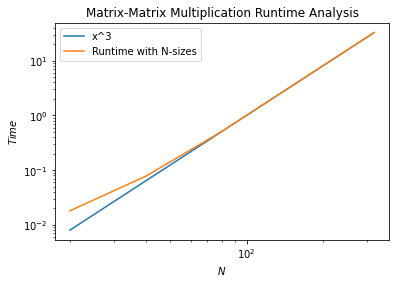

In [26]:
# Plotting the x^3 asymptotic bound
x_cords = range(20, 320)
y_cords = [x*x*x*1e-6 for x in x_cords]
plt.plot(x_cords, y_cords, label='x^3')

# Plot the runtime results
plt.loglog(N_arr, time_list, label='Runtime with N-sizes')
plt.xlabel('$N$')
plt.ylabel('$Time$')

plt.legend(loc="upper left")
plt.title('Matrix-Matrix Multiplication Runtime Analysis')

plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
files.download("my_plot.png")
plt.show() 
